In [92]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTENC

In [94]:
df = pd.read_csv("./cancer_dataset.csv")

In [96]:
df

,district,last_cancer_screening,current_cancer,have_children,gender,weight,height,age,red_meat_weekly,veg_weekly,...,breast_q1,breast_q2,breast_q3,breast_q4,breast_q5,liver_q1,liver_q2,liver_q3,liver_q4,liver_q5
0,District 5,A year ago,No,Yes,Female,56,160.0,30,2,8.0,...,No,No,No,No,No,No,No,No,No,No
1,Binh Tan District,A year ago,No,Yes,Male,63,165.0,40,3,5.0,...,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes
2,District 3,A year ago,No,Yes,Female,60,162.0,31,3,14.0,...,No,No,No,No,No,No,No,No,No,No
3,Tan Binh District,A year ago,No,Yes,Male,72,175.0,30,4,6.0,...,No,No,No,No,No,No,Yes,No,No,Yes
4,District 1,A year ago,No,Yes,Male,63,165.0,40,3,5.0,...,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,Binh Thanh District,A year ago,No,NaN,Female,52,153.0,46,2,7.0,...,No,No,No,No,No,No,Yes,Yes,No,Yes
179,Thu Duc District,A year ago,No,NaN,Female,61,158.0,40,4,7.0,...,No,No,No,No,No,No,No,No,No,No
180,District 12,A year ago,No,NaN,Male,59,163.0,65,1,7.0,...,No,No,No,No,No,No,No,No,No,No
181,District 12,6 months ago,No,NaN,Female,52,155.0,55,2,7.0,...,No,No,No,No,No,No,No,No,No,No


# 1. Preprocessing Data

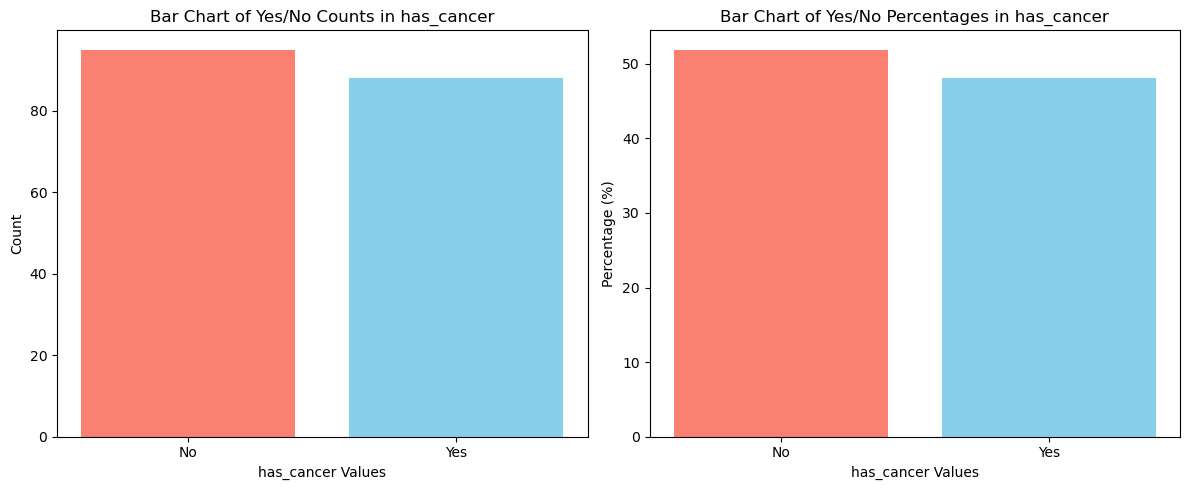

current_cancer
No     95
Yes    88
Name: count, dtype: int64

In [99]:
counts = df['current_cancer'].value_counts()


# Calculate percentages
percentages = counts / counts.sum() * 100

# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Bar Chart with Counts
axs[0].bar(counts.index, counts.values, color=['salmon', 'skyblue'])
axs[0].set_title('Bar Chart of Yes/No Counts in has_cancer')
axs[0].set_xlabel('has_cancer Values')
axs[0].set_ylabel('Count')

# Bar Chart with Percentages
axs[1].bar(percentages.index, percentages.values, color=['salmon', 'skyblue'])
axs[1].set_title('Bar Chart of Yes/No Percentages in has_cancer')
axs[1].set_xlabel('has_cancer Values')
axs[1].set_ylabel('Percentage (%)')

# Adjust layout
plt.tight_layout()
plt.show()
counts

In [101]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['district_encoded'] = label_encoder.fit_transform(df['district'])

binary_questions = ['breast_q1', 'breast_q2', 'breast_q3', 'breast_q4',	'breast_q5', 'liver_q1', 'liver_q2', 'liver_q3', 'liver_q4', 'liver_q5']

df = df.replace(to_replace = ['Yes', 'No'], value = [1, 0])

df['breast_score'] = df[binary_questions[0:5]].sum(axis=1)
df['liver_score'] = df[binary_questions[5:]].sum(axis=1)

/var/folders/td/cp8pk7qn70s163f4fndy1jt40000gn/T/ipykernel_2208/1228530410.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(to_replace = ['Yes', 'No'], value = [1, 0])


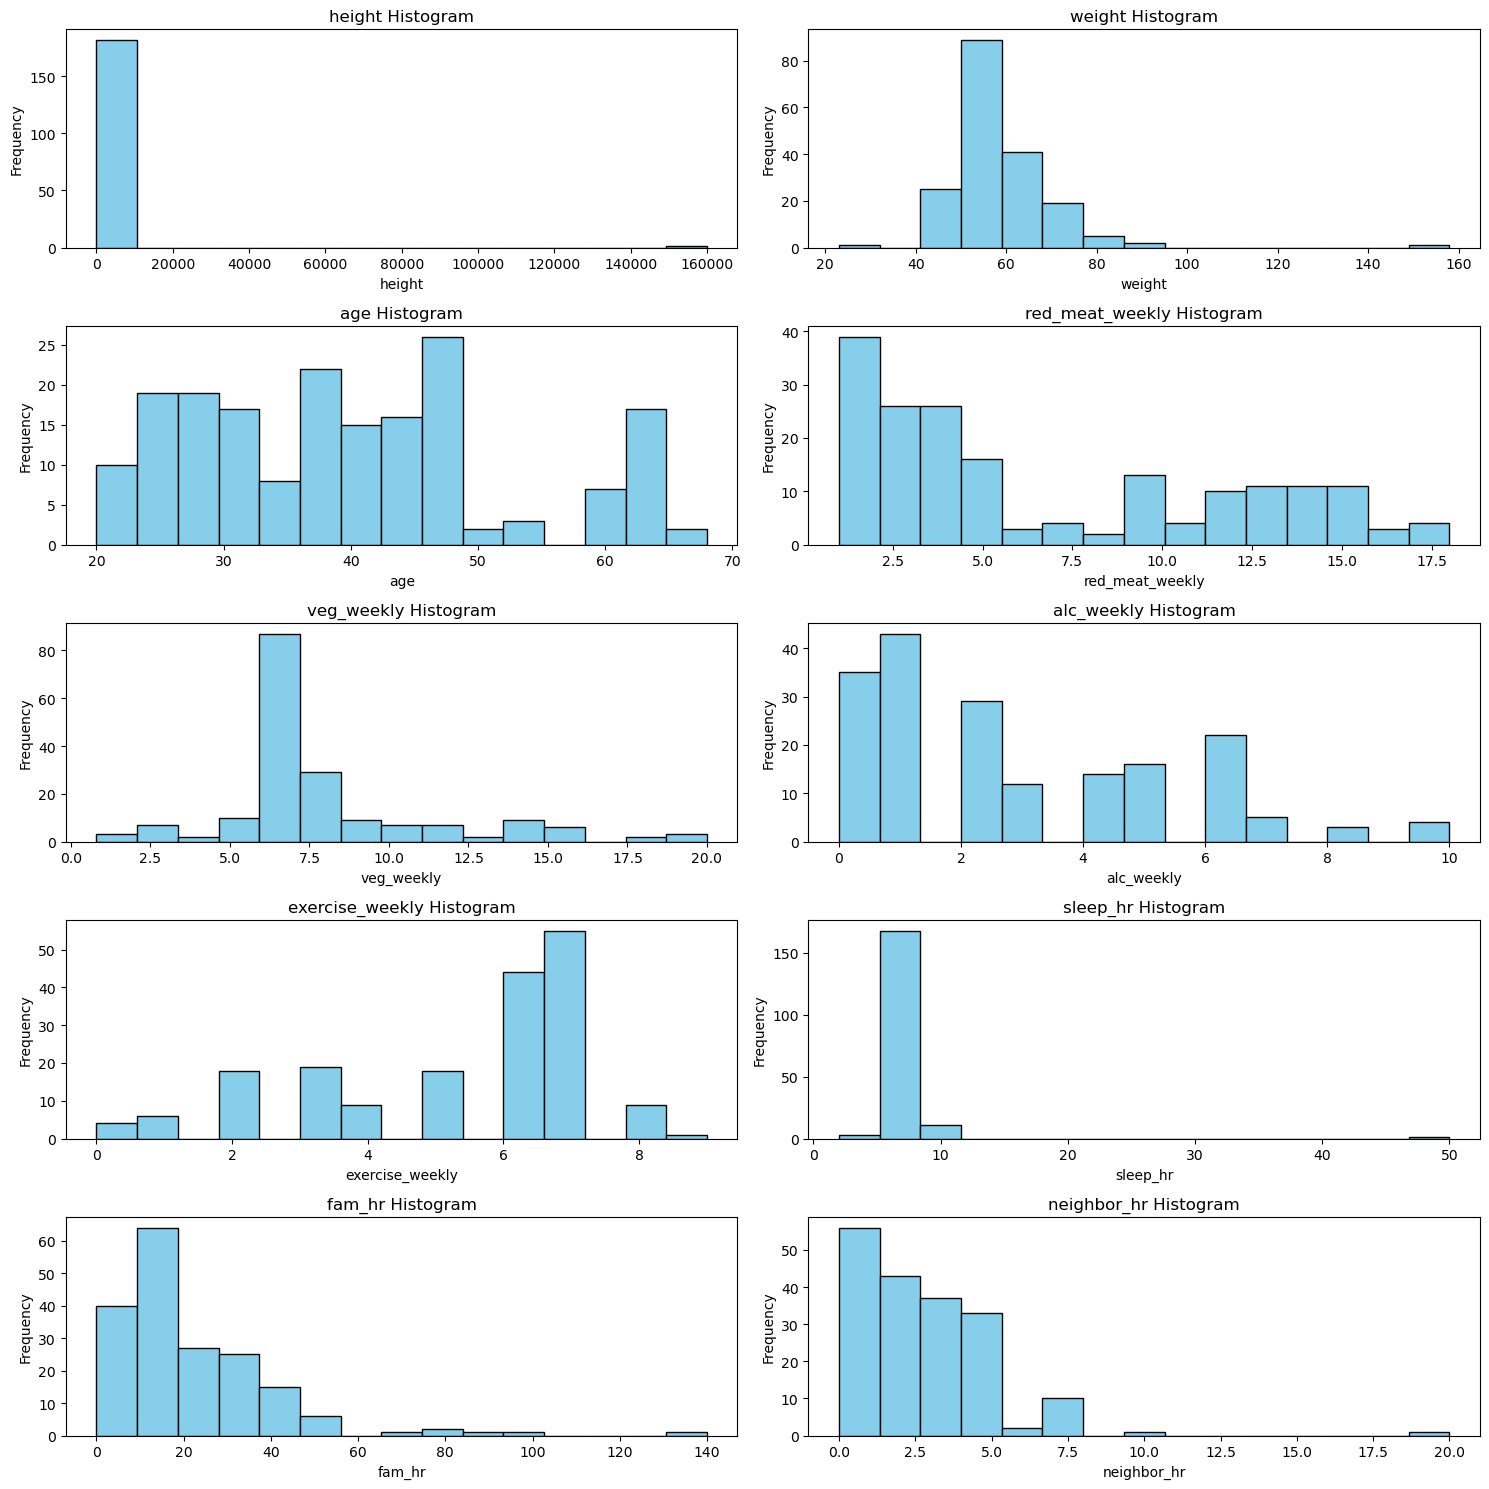

In [103]:
variables = ['height', 'weight', 'age', 'red_meat_weekly', 'veg_weekly', 
             'alc_weekly', 'exercise_weekly', 'sleep_hr', 'fam_hr', 'neighbor_hr']

# Create histograms
plt.figure(figsize=(15, 15))
for i, var in enumerate(variables):
    plt.subplot(5, 2, i + 1)  # Adjust layout for 10 variables
    plt.hist(df[var], bins=15, color='skyblue', edgecolor='black')
    plt.title(f'{var} Histogram')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

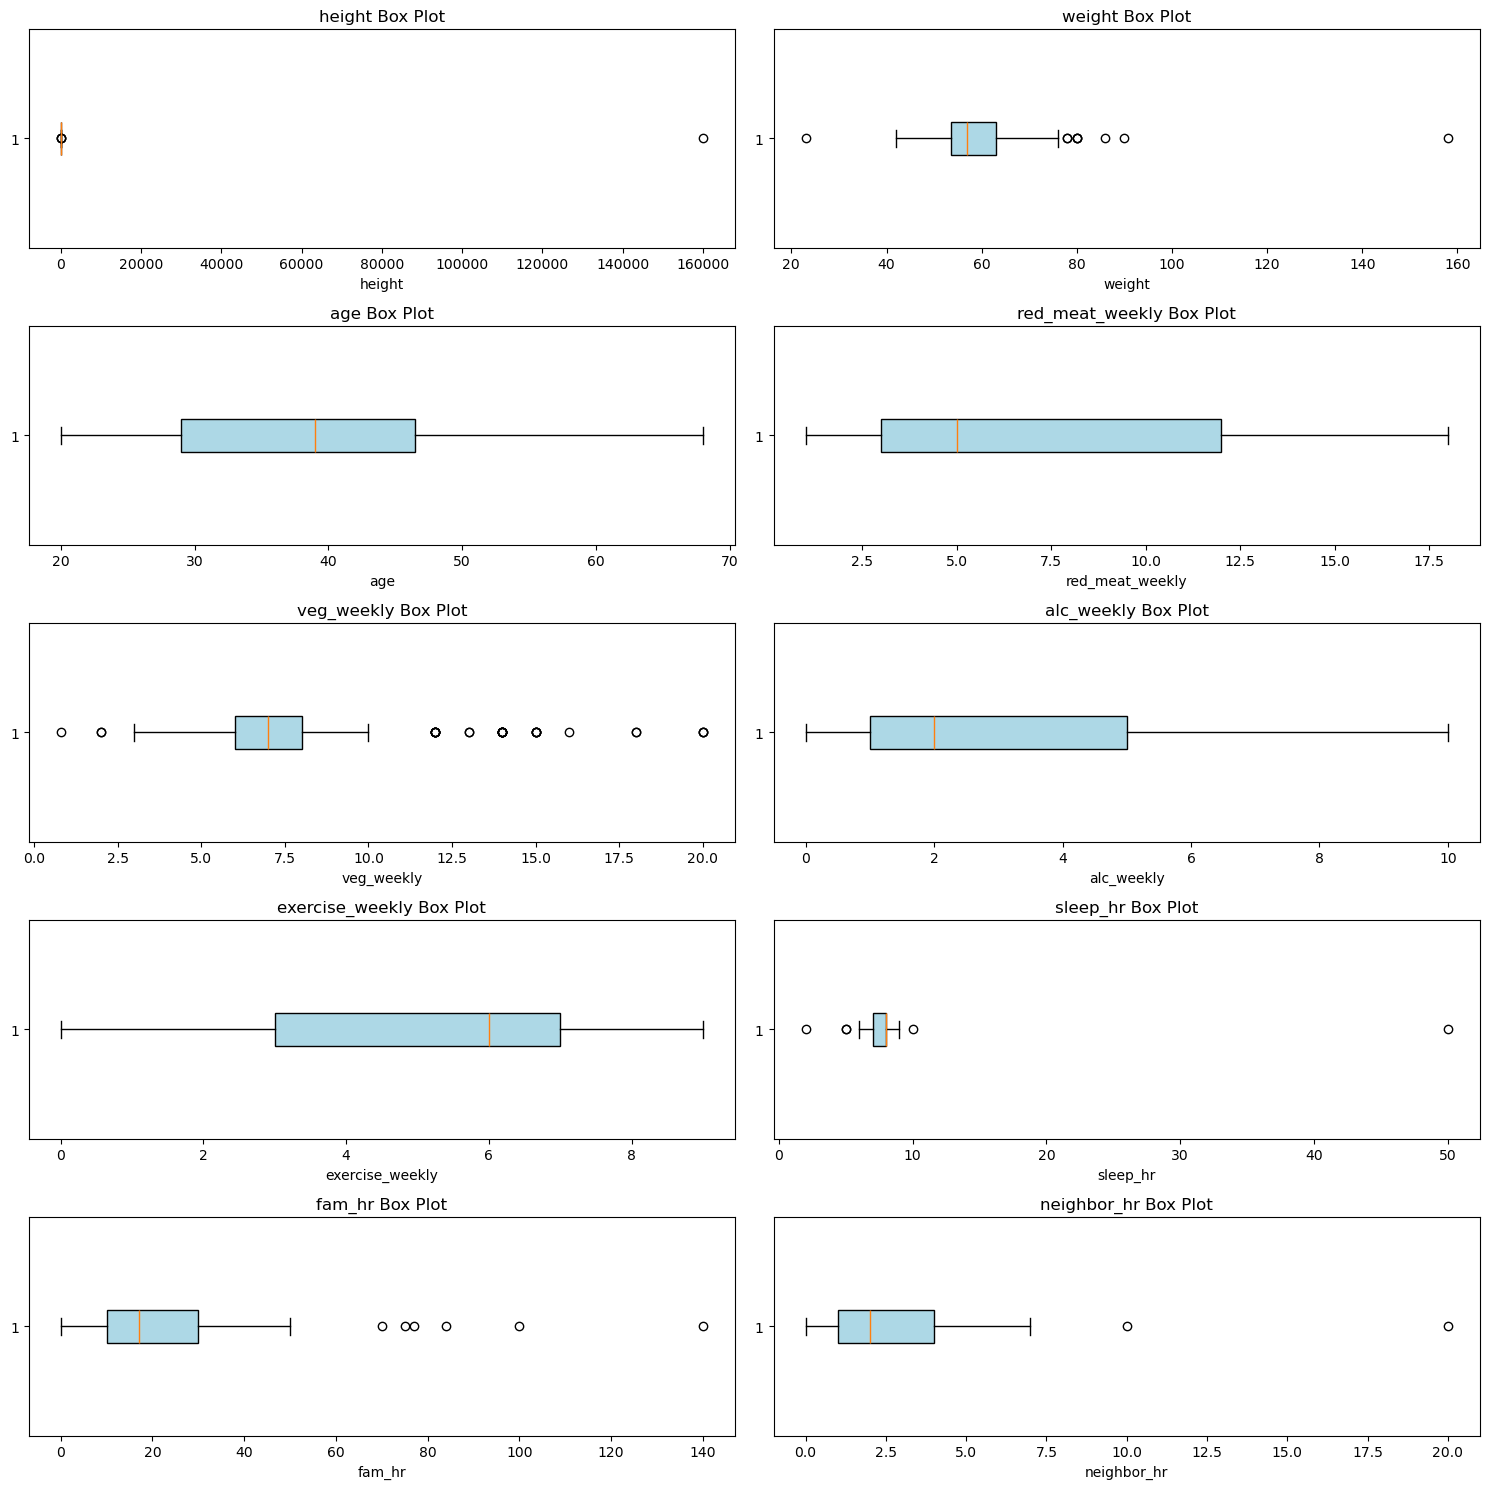

In [104]:
plt.figure(figsize=(15, 15))
for i, var in enumerate(variables):
    plt.subplot(5, 2, i + 1)  # Adjust layout for 10 variables
    plt.boxplot(df[var], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(f'{var} Box Plot')
    plt.xlabel(var)

plt.tight_layout()
plt.show()

In [105]:
df.loc[df['height'] == 160000, 'height'] = 160
df.loc[df['height'] == 1.55, 'height'] = 155
df.loc[df['height'] == 1.58, 'height'] = 158
df.loc[df['height'] == 60, 'height'] = 160

df = df[(df['weight'] < 158) & (df['weight'] > 23)]
df = df[(df['sleep_hr'] < 40) & (df['sleep_hr'] > 2)]
df['bmi'] = df['weight']/(df['height']/100)**2

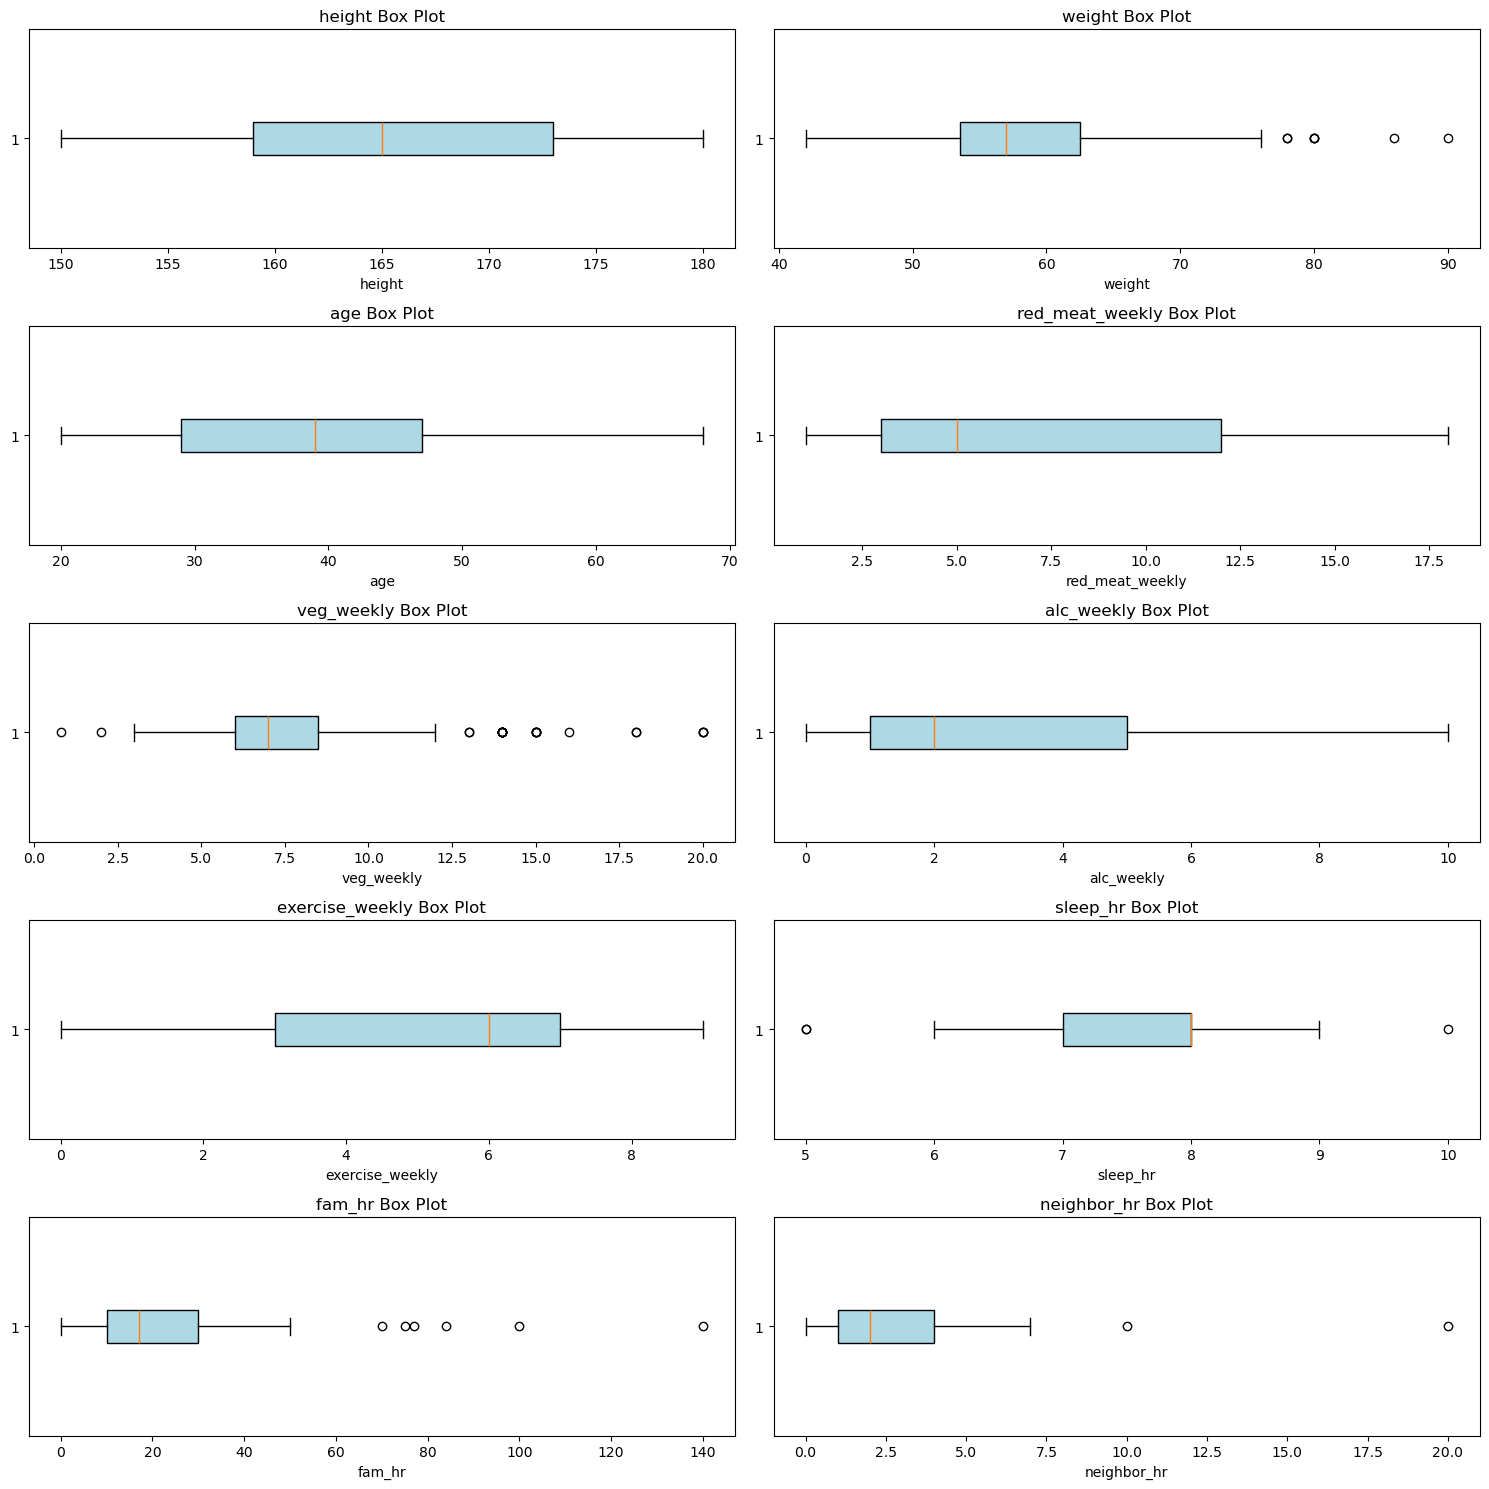

In [107]:
plt.figure(figsize=(15, 15))
for i, var in enumerate(variables):
    plt.subplot(5, 2, i + 1)  # Adjust layout for 10 variables
    plt.boxplot(df[var], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    plt.title(f'{var} Box Plot')
    plt.xlabel(var)

plt.tight_layout()
plt.show()

In [110]:
df.drop(columns=binary_questions + ['have_children', 'weight', 'height', 'district', 'chronic_dis_list'], inplace = True)

In [111]:
# For cancer history, we assume people who are not sure to not have cancer history.

replacements = {
    'A year ago': 0,
    '6 months ago': 1,
    'Female': 0,
    'Male': 1,
    'Not sure': 0
}

# Replace all values in one line
df = df.replace(replacements)

/var/folders/td/cp8pk7qn70s163f4fndy1jt40000gn/T/ipykernel_2208/2081458535.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(replacements)


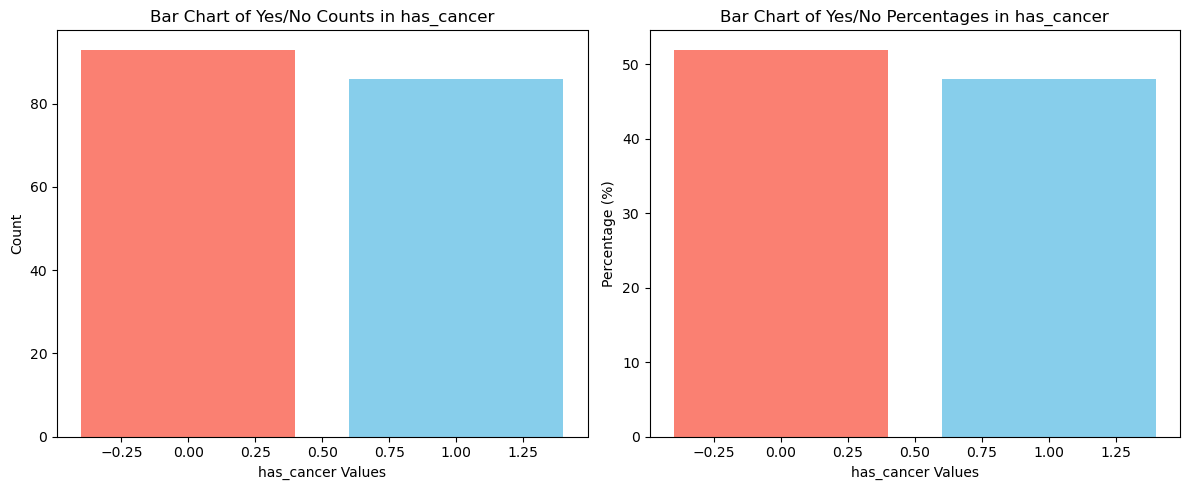

current_cancer
0    93
1    86
Name: count, dtype: int64

In [115]:
counts = df['current_cancer'].value_counts()


# Calculate percentages
percentages = counts / counts.sum() * 100

# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Bar Chart with Counts
axs[0].bar(counts.index, counts.values, color=['salmon', 'skyblue'])
axs[0].set_title('Bar Chart of Yes/No Counts in has_cancer')
axs[0].set_xlabel('has_cancer Values')
axs[0].set_ylabel('Count')

# Bar Chart with Percentages
axs[1].bar(percentages.index, percentages.values, color=['salmon', 'skyblue'])
axs[1].set_title('Bar Chart of Yes/No Percentages in has_cancer')
axs[1].set_xlabel('has_cancer Values')
axs[1].set_ylabel('Percentage (%)')

# Adjust layout
plt.tight_layout()
plt.show()
counts

# 2. Feature Engineering

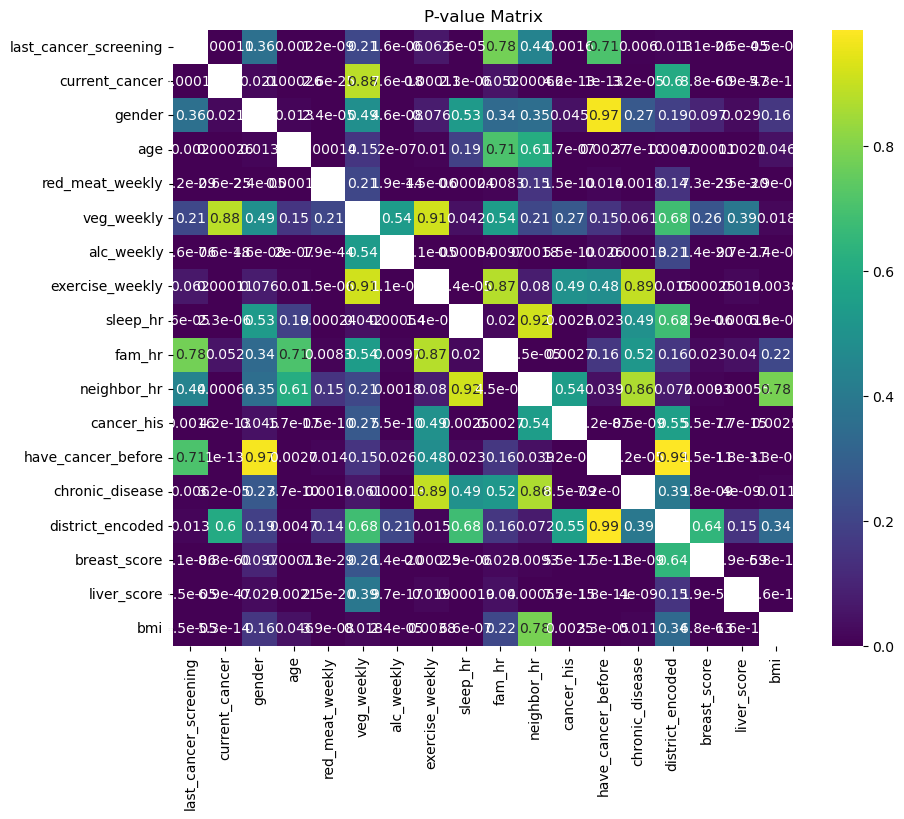

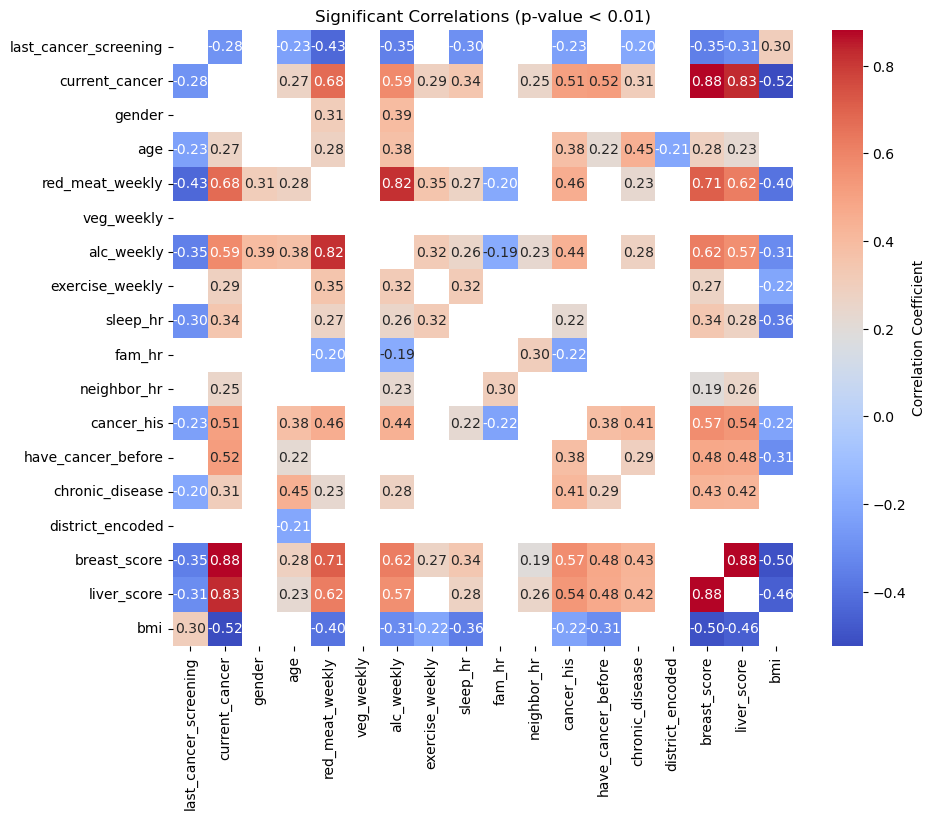

In [118]:
from scipy.stats import pearsonr
import seaborn as sns

# Assuming `df` is your DataFrame
columns = df.columns
correlation_matrix = np.zeros((len(columns), len(columns)))
p_value_matrix = np.zeros((len(columns), len(columns)))

# Compute correlation and p-values for each pair
for i in range(len(columns)):
    for j in range(len(columns)):
        if i != j:
            corr, p_value = pearsonr(df[columns[i]], df[columns[j]])
            correlation_matrix[i, j] = corr
            p_value_matrix[i, j] = p_value
        else:
            correlation_matrix[i, j] = 1.0  # Correlation with itself is 1
            p_value_matrix[i, j] = np.nan  # P-value is undefined for self-correlation

# Convert to DataFrames for better readability
correlation_df = pd.DataFrame(correlation_matrix, index=columns, columns=columns)
p_value_df = pd.DataFrame(p_value_matrix, index=columns, columns=columns)

# Create a mask for significant p-values
significant_mask = p_value_df < 0.01

# Filter correlations with significant p-values
significant_correlations = correlation_df.where(significant_mask)

# Plot the P-value Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(p_value_df, annot=True, cmap='viridis', fmt=".2g")
plt.title("P-value Matrix")
plt.show()

# Plot the Significant Correlations Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    significant_correlations,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    cbar_kws={"label": "Correlation Coefficient"}
)
plt.title("Significant Correlations (p-value < 0.01)")
plt.show()

In [120]:
#Drop veg_weekly, fam_hr, district_encoded because they don't have significant linear relationship with current cancer. Gender is kept as it can predict where a person have high chance of getting breast cancer or not.
df = df.drop(columns=['veg_weekly', 'fam_hr', 'district_encoded'])

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Assuming your dataset is already loaded into a DataFrame called 'df'

# Exclude the target variable 'current_cancer'
X = df.drop(columns=["current_cancer"])

# Add a constant for the intercept
X = add_constant(X)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display the VIF results
print(vif_data)

                  Feature         VIF
0                   const  280.607319
1   last_cancer_screening    1.383067
2                  gender    1.334142
3                     age    1.537617
4         red_meat_weekly    4.535479
5              alc_weekly    3.832171
6         exercise_weekly    1.349242
7                sleep_hr    1.372588
8             neighbor_hr    1.249780
9              cancer_his    1.803034
10     have_cancer_before    1.541487
11        chronic_disease    1.611438
12           breast_score    6.679353
13            liver_score    5.097043
14                    bmi    1.595250


In [124]:
df['avg_score'] = (df['breast_score'] + df['liver_score'])/2
df = df.drop(columns = ['breast_score', 'liver_score'])

# 3. Model Training

In [127]:
X = df.drop(columns=["current_cancer"]) 
y = df["current_cancer"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Initialize Logistic Regression with L2 regularization (default)
model = LogisticRegression(penalty='l2', C=1.0, random_state=42)  # Add L2 regularization
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Predict and evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report (L2 Regularization):")
print(classification_report(y_test, y_pred))

Accuracy: 0.9722222222222222
Classification Report (L2 Regularization):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.94      0.97        17

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36



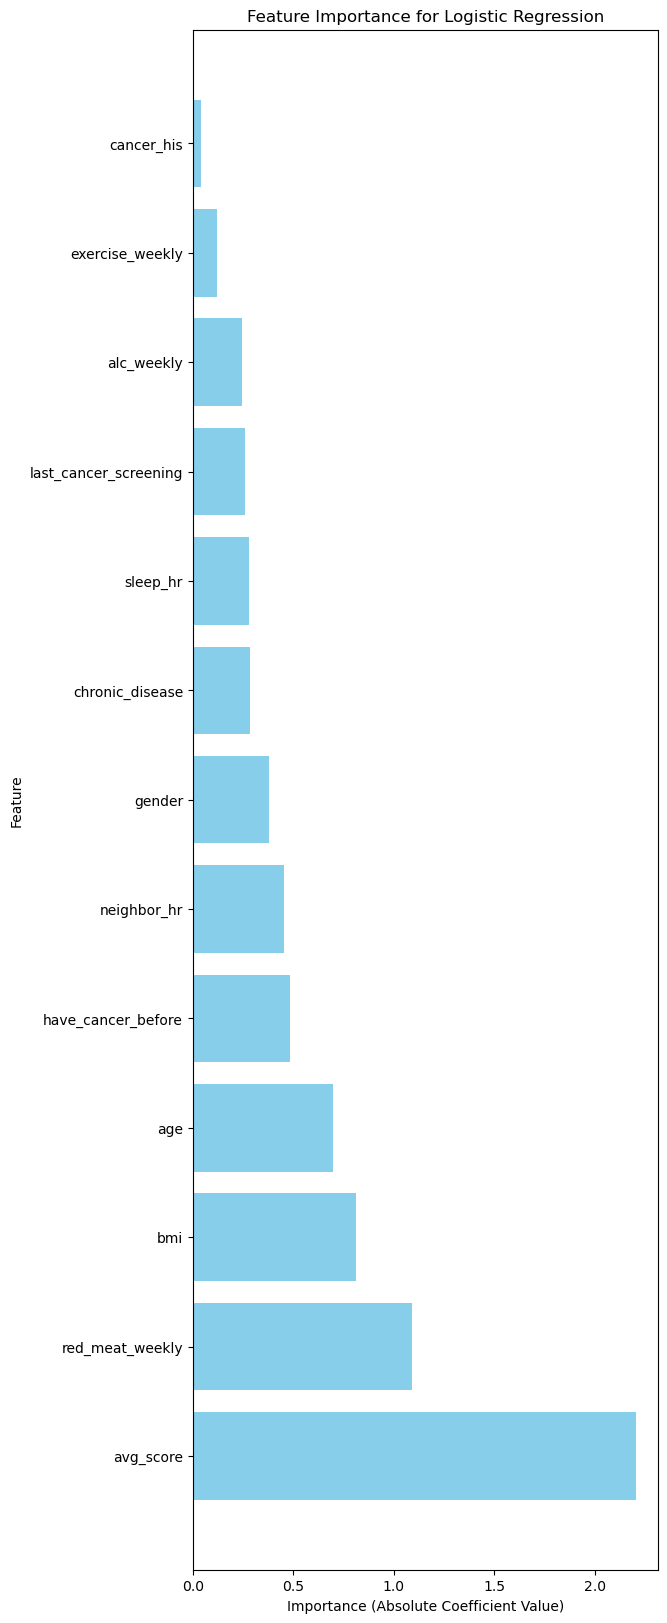

In [129]:
importance = np.abs(model.coef_[0])
feature_names = X.columns  # Get feature names from the DataFrame

sorted_indices = np.argsort(importance)
sorted_importance = importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Visualize feature importance
plt.figure(figsize=(6, 20))
plt.barh(sorted_feature_names, sorted_importance, color="skyblue")
plt.xlabel("Importance (Absolute Coefficient Value)")
plt.ylabel("Feature")
plt.title("Feature Importance for Logistic Regression")
plt.gca().invert_yaxis()
plt.show()

In [131]:
# Train new model with only 7 most significant variables

# New model training for real dataset
features = ['avg_score', 'red_meat_weekly', 'bmi', 'age', 'have_cancer_before', 'neighbor_hr', 'gender']
X_2 = df[features]
y_2 = df['current_cancer']
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_2_train = scaler.fit_transform(X_2_train)
X_2_test = scaler.transform(X_2_test)

model = LogisticRegression(penalty='l2', C=1.0, random_state=42)
model.fit(X_2_train, y_2_train)

y_2_pred = model.predict(X_2_test)
y_2_pred_prob = model.predict_proba(X_2_test)[:, 1]

print("Accuracy:", accuracy_score(y_2_test, y_2_pred))
print("\nClassification Report:\n", classification_report(y_2_test, y_2_pred))
print("ROC-AUC Score:", roc_auc_score(y_2_test, y_2_pred_prob))

Accuracy: 0.9722222222222222

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       1.00      0.94      0.97        17

    accuracy                           0.97        36
   macro avg       0.97      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

ROC-AUC Score: 0.9876160990712074


# 4. Dataset Balancing and Model Re-training

In [134]:
def sample_strategy_logistic(X, y, categorical_features, cv_splits=5, strategy=None):
    continuous_features = [i for i in range(X.shape[1]) if i not in categorical_features]
    X_continuous = X.iloc[:, continuous_features]
    X_categorical = X.iloc[:, categorical_features]

    # Scale continuous features
    scaler = StandardScaler()
    X_continuous_scaled = scaler.fit_transform(X_continuous)
    X_scaled = np.hstack([X_continuous_scaled, X_categorical])

    smote = SMOTENC(
        categorical_features=categorical_features,
        sampling_strategy={0: strategy, 1: strategy},
        random_state=42
    )
    X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

    # Initialize cross-validation
    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    
    fold_metrics = {
        'accuracy': [],
        'roc_auc': [],
        'precision': [],
        'recall': [],
        'train_accuracy': [],
        'train_roc_auc': [],
        'train_precision': [],
        'train_recall': [],
    }
    y_test_all, y_pred_all = [], []
    
    for train_idx, val_idx in skf.split(X_resampled, y_resampled):
        X_train, X_val = X_resampled[train_idx], X_resampled[val_idx]
        y_train, y_val = y_resampled[train_idx], y_resampled[val_idx]
        
        # Logistic Regression with balanced class weights
        lr = LogisticRegression(
            penalty='l2',
            solver='lbfgs',
            max_iter=1000,
            class_weight='balanced',
            random_state=42
        )
        lr.fit(X_train, y_train)
        
        # Predictions
        y_pred = lr.predict(X_val)
        y_pred_prob = lr.predict_proba(X_val)[:, 1]
        
        # Store predictions
        y_test_all.append(y_val)
        y_pred_all.append(y_pred)
        
        # Calculate metrics
        fold_metrics['accuracy'].append(accuracy_score(y_val, y_pred))
        fold_metrics['roc_auc'].append(roc_auc_score(y_val, y_pred_prob))
        fold_metrics['precision'].append(precision_score(y_val, y_pred))
        fold_metrics['recall'].append(recall_score(y_val, y_pred))

        # Training metrics
        y_train_pred = lr.predict(X_train)
        y_train_pred_prob = lr.predict_proba(X_train)[:, 1]
        
        fold_metrics['train_accuracy'].append(accuracy_score(y_train, y_train_pred))
        fold_metrics['train_roc_auc'].append(roc_auc_score(y_train, y_train_pred_prob))
        fold_metrics['train_precision'].append(precision_score(y_train, y_train_pred))
        fold_metrics['train_recall'].append(recall_score(y_train, y_train_pred))
    
    metrics = {
        'avg_accuracy': np.mean(fold_metrics['accuracy']),
        'avg_roc_auc': np.mean(fold_metrics['roc_auc']),
        'avg_precision': np.mean(fold_metrics['precision']),
        'avg_recall': np.mean(fold_metrics['recall']),
        'avg_train_accuracy': np.mean(fold_metrics['train_accuracy']),
        'avg_train_roc_auc': np.mean(fold_metrics['train_roc_auc']),
        'avg_train_precision': np.mean(fold_metrics['train_precision']),
        'avg_train_recall': np.mean(fold_metrics['train_recall']),
    }

    return metrics

def best_strategy_logistic(X, y, categorical_features, cv_splits=5, strategy_range=None):
    results = []
    for strategy in strategy_range:
        result = sample_strategy_logistic(X, y, categorical_features, cv_splits=cv_splits, strategy=strategy)
        result['strategy'] = strategy
        results.append(result)
    return results

In [136]:
features = ['avg_score', 'red_meat_weekly', 'bmi', 'age', 'have_cancer_before', 'neighbor_hr', 'gender']
X = df[features]
y = df['current_cancer']
categorical_features = [4, 6]

strategy_range = range(100, 300, 50)

results = best_strategy_logistic(X, y, categorical_features, cv_splits=5, strategy_range=strategy_range)

# Print results
for result in results:
    print(f"Strategy: {result['strategy']}")
    print(f"  Validation Accuracy: {result['avg_accuracy']:.3f}")
    print(f"  Validation ROC-AUC: {result['avg_roc_auc']:.3f}")
    print(f"  Validation Precision: {result['avg_precision']:.3f}")
    print(f"  Validation Recall: {result['avg_recall']:.3f}")
    print(f"  Training Accuracy: {result['avg_train_accuracy']:.3f}")
    print(f"  Training ROC-AUC: {result['avg_train_roc_auc']:.3f}")
    print(f"  Training Precision: {result['avg_train_precision']:.3f}")
    print(f"  Training Recall: {result['avg_train_recall']:.3f}\n")

Strategy: 100
  Validation Accuracy: 0.935
  Validation ROC-AUC: 0.983
  Validation Precision: 0.945
  Validation Recall: 0.930
  Training Accuracy: 0.950
  Training ROC-AUC: 0.991
  Training Precision: 0.966
  Training Recall: 0.932

Strategy: 150
  Validation Accuracy: 0.950
  Validation ROC-AUC: 0.989
  Validation Precision: 0.967
  Validation Recall: 0.933
  Training Accuracy: 0.958
  Training ROC-AUC: 0.993
  Training Precision: 0.968
  Training Recall: 0.948

Strategy: 200
  Validation Accuracy: 0.965
  Validation ROC-AUC: 0.994
  Validation Precision: 0.975
  Validation Recall: 0.955
  Training Accuracy: 0.966
  Training ROC-AUC: 0.995
  Training Precision: 0.975
  Training Recall: 0.956

Strategy: 250
  Validation Accuracy: 0.966
  Validation ROC-AUC: 0.995
  Validation Precision: 0.972
  Validation Recall: 0.960
  Training Accuracy: 0.965
  Training ROC-AUC: 0.996
  Training Precision: 0.974
  Training Recall: 0.957



In [138]:
def train_evaluate_model_logistic(X, y, categorical_features, strategy, cv_splits=5):
    # Separate continuous and categorical features
    continuous_features = [i for i in range(X.shape[1]) if i not in categorical_features]
    X_continuous = X.iloc[:, continuous_features]
    X_categorical = X.iloc[:, categorical_features]

    # Scale continuous features
    scaler = StandardScaler()
    X_continuous_scaled = scaler.fit_transform(X_continuous)
    X_scaled = np.hstack([X_continuous_scaled, X_categorical])

    # Apply SMOTENC
    smote = SMOTENC(
        categorical_features=categorical_features,
        sampling_strategy = {0: strategy, 1: strategy},
        random_state=42
    )
    X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

    # Initialize cross-validation
    skf = StratifiedKFold(n_splits=cv_splits, shuffle=True, random_state=42)
    
    # Initialize metrics storage
    fold_metrics = {
        'accuracy': [],
        'roc_auc': [],
    }
    coefficients = np.zeros(X_resampled.shape[1])
    y_test_all, y_pred_all, y_pred_proba_all = [], [], []
    
    for train_idx, val_idx in skf.split(X_resampled, y_resampled):
        # Split the data
        X_train, X_val = X_resampled[train_idx], X_resampled[val_idx]
        y_train, y_val = y_resampled[train_idx], y_resampled[val_idx]
        
        # Train Logistic Regression
        lr = LogisticRegression(
            penalty='l2',
            solver='lbfgs',
            max_iter=1000,
            class_weight='balanced',
            random_state=42
        )
        lr.fit(X_train, y_train)
        
        # Evaluate
        y_pred = lr.predict(X_val)
        y_pred_prob = lr.predict_proba(X_val)[:, 1]
        
        # Store predictions
        y_test_all.append(y_val)
        y_pred_all.append(y_pred)
        y_pred_proba_all.append(y_pred_prob)
        
        # Calculate metrics
        acc = accuracy_score(y_val, y_pred)
        roc_auc = roc_auc_score(y_val, y_pred_prob)
        
        # Store metrics
        fold_metrics['accuracy'].append(acc)
        fold_metrics['roc_auc'].append(roc_auc)
        
        # Accumulate coefficients (instead of feature importance)
        coefficients += np.abs(lr.coef_[0])
    
    # Average metrics and coefficients
    avg_accuracy = np.mean(fold_metrics['accuracy'])
    avg_roc_auc = np.mean(fold_metrics['roc_auc'])
    coefficients /= cv_splits
    
    # Concatenate results from all folds
    y_test_all = np.concatenate(y_test_all)
    y_pred_all = np.concatenate(y_pred_all)
    y_pred_proba_all = np.concatenate(y_pred_proba_all)
    
    # Print Metrics
    print(f"Cross-validation ROC-AUC Score: {avg_roc_auc:.3f}")
    print(f"Cross-validation Accuracy: {avg_accuracy:.3f}")
    print("\nClassification Report:")
    print(classification_report(y_test_all, y_pred_all))
    
    # Visualization
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Confusion Matrix
    plt.subplot(131)
    cm = confusion_matrix(y_test_all, y_pred_all)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    # Plot 2: ROC Curve
    plt.subplot(132)
    fpr, tpr, _ = roc_curve(y_test_all, y_pred_proba_all)
    plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {avg_roc_auc:.3f})')
    plt.plot([0, 1], [0, 1], 'r--', label='Random')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    
    # Plot 3: Feature Coefficients
    plt.subplot(133)
    coef_df = pd.DataFrame({
        'feature': X.columns,
        'coefficient': coefficients
    })
    coef_df = coef_df.sort_values('coefficient', ascending=True)
    plt.barh(coef_df['feature'], coef_df['coefficient'])
    plt.title('Feature Coefficients (Absolute Values)')
    plt.xlabel('Coefficient Magnitude')
    
    plt.tight_layout()
    plt.show()
    
    return lr, scaler, avg_accuracy, avg_roc_auc, coefficients

Cross-validation ROC-AUC Score: 0.989
Cross-validation Accuracy: 0.950

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       150
           1       0.97      0.93      0.95       150

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



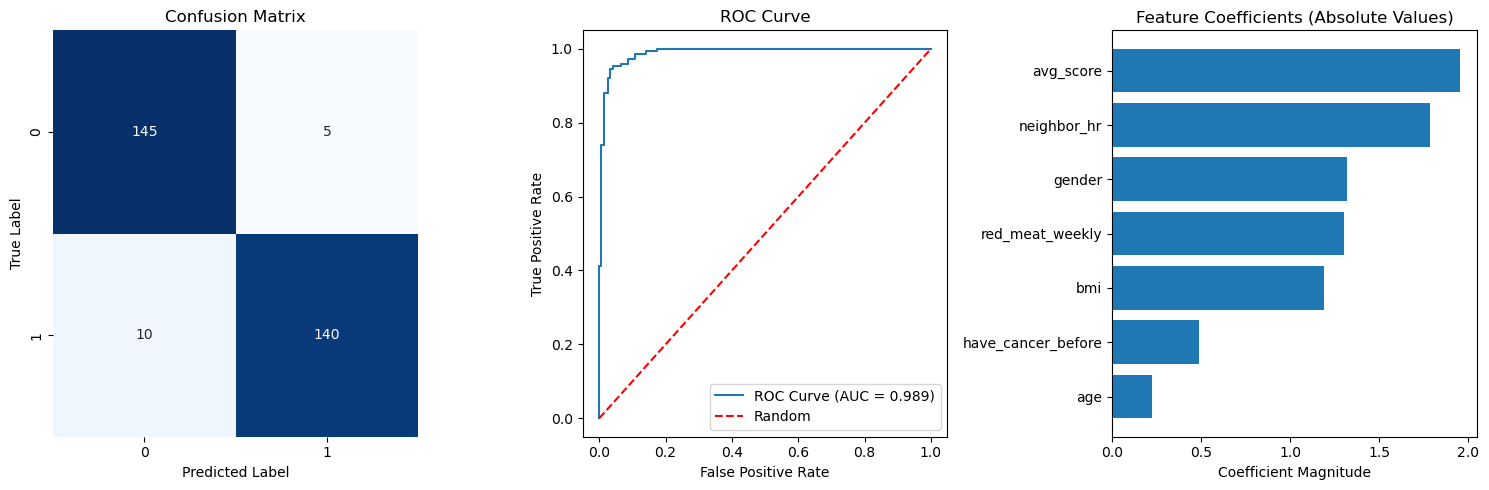

In [140]:
features = ['avg_score', 'red_meat_weekly', 'bmi', 'age', 'have_cancer_before', 'neighbor_hr', 'gender']
X = df[features]
y = df['current_cancer']
categorical_features = [4, 6]

# Train and evaluate
model, scaler, avg_accuracy, avg_roc_auc, feature_coef = train_evaluate_model_logistic(X, y, categorical_features, 150)

In [147]:
def get_risk_assessment(model, X, feature_names, scaler, categorical_features):
    
    continuous_features = [i for i in range(X.shape[1]) if i not in categorical_features]
    X_continuous = X.iloc[:, continuous_features]
    X_categorical = X.iloc[:, categorical_features]

    # scale
    X_continuous_scaled = scaler.transform(X_continuous)
    print(X_continuous_scaled)
    X_scaled = np.hstack([X_continuous_scaled, X_categorical])
    # Get probability scores
    probs = model.predict_proba(X_scaled)
    
    # Calculate risk scores (0-100)
    risk_scores = probs[:, 1] * 100
    
    # Calculate confidence (distance from decision boundary)
    confidence = np.abs(probs[:, 1] - 0.5) * 2 * 100
    
    # Adjust risk scores by confidence
    adjusted_risk_scores = risk_scores * (confidence / 100)
    
    results = pd.DataFrame({
        'Risk Score': risk_scores,
        'Confidence': confidence,
        'Adjusted Risk Score': adjusted_risk_scores,
        'Risk Level': ['High Risk' if s >= 70 
                      else 'Medium Risk' if s >= 40 
                      else 'Low Risk' for s in adjusted_risk_scores]
    })
    
    return results

single_case = pd.DataFrame({
    'avg_score': [5], 
    'red_meat_weekly': [10],  
    'bmi': [30],  
    'age': [60],  
    'have_cancer_before': [1],  
    'neighbor_hr': [5],  
    'gender': [1]
})

print("\nRisk Assessment for Single Case:")
print(get_risk_assessment(model, single_case, features, scaler, categorical_features))


Risk Assessment for Single Case:
[[1.40979573 0.61246317 3.40210267 1.61826545 0.97994063]]
   Risk Score  Confidence  Adjusted Risk Score Risk Level
0   96.458523   92.917046            89.626411  High Risk


# 5. Export The Model

In [153]:
import json

# Create a dictionary with the parameters
scaler_params = {
    'means': scaler.mean_.tolist(),  # Convert numpy array to list
    'stds': scaler.scale_.tolist()   # Convert numpy array to list
}

with open('scaler_params.json', 'w') as f:
    json.dump(scaler_params, f, indent=4)

In [145]:
import coremltools as ct

# Save the fitted scaler
model.multi_class = 'ovr'

features = ['avg_score', 'red_meat_weekly', 'bmi', 'age', 'have_cancer_before', 'neighbor_hr', 'gender']

# Convert the logistic regression model
coreml_model = ct.converters.sklearn.convert(
    model,
    input_features=features,  # Just pass feature names directly
    output_feature_names='current_cancer'  # Specify output feature name
)

# Save the converted model
coreml_model.save("CancerRiskPredictor.mlmodel")

print("Logistic Regression model successfully converted to Core ML format!")

Logistic Regression model successfully converted to Core ML format!
